In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from google.colab import files

from PIL import Image, ImageDraw

In [ ]:
file = files.upload()

Saving 113.jpg to 113.jpg


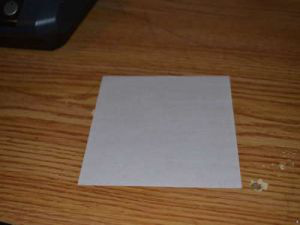

In [ ]:
image = Image.open('113.jpg')
image

In [ ]:
pix = image.load()
data = np.array([[int((pix[x, y][0] + pix[x, y][1] + pix[x, y][2]) / 3) for x in range(image.size[0])] for y in range(image.size[1])])
data

array([[ 10,  10,  10, ...,  41,  41,  41],
       [ 10,  10,  10, ...,  38,  38,  38],
       [  9,  10,  10, ...,  35,  35,  35],
       ...,
       [ 10,  16,  24, ..., 129,  85,  68],
       [  8,   7,   7, ...,  87,  81,  79],
       [  8,   7,   7, ...,  80,  79,  79]])

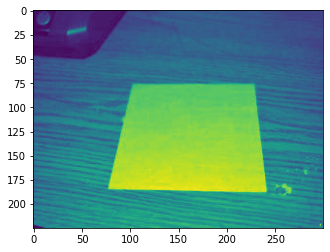

In [ ]:
plt.imshow(data)

# Сформируем матрицу свертки

In [ ]:
k = 1/9 * np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
k

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

# Применим матрицу свертки

In [ ]:
from scipy import ndimage

array([[ 9,  9,  9, ..., 40, 40, 40],
       [ 9,  9,  9, ..., 37, 37, 37],
       [ 9,  9,  9, ..., 35, 35, 35],
       ...,
       [22, 25, 30, ..., 98, 90, 73],
       [ 9, 10, 13, ..., 88, 85, 77],
       [ 7,  7,  7, ..., 80, 80, 79]])

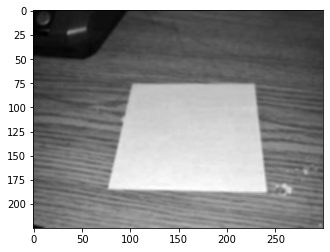

In [ ]:
plt.gray()
res = ndimage.convolve(data, k)
plt.imshow(res)
res

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

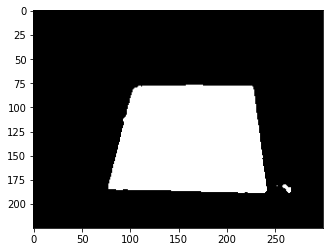

In [ ]:
imover = np.zeros(res.shape)
for i in range(res.shape[0]):
  for j in range(res.shape[1]):
    if abs(res[i,j]) > 120:
      imover[i, j] = 1

plt.imshow(imover)
imover

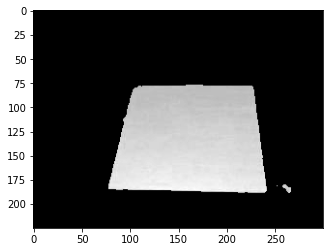

In [ ]:
new_img = data * imover
plt.imshow(new_img, cmap=plt.cm.gray)

# Создадим новое изображение, зальем его выбранным цветом

In [ ]:
p = Image.new(color=(0, 0, 255), size=(res.shape[1], res.shape[0]), mode='RGB')
q = ImageDraw.Draw(p)

# Cкопируем выделенные фрагменты в новое изображение

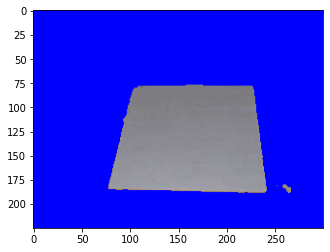

In [ ]:
w = np.asarray(image)
for x in range(image.size[1]):
  for y in range(image.size[0]):
    if abs(imover[x,y]):
      q.point((y, x), (w[x,y,0], w[x,y,1], w[x,y,2]))

plt.imshow(p)